In [113]:
import numpy
import matplotlib.pyplot as mp
import netCDF4
import cartopy

% matplotlib inline

DEGREE_SIGN = u'\u00B0'

In [2]:
season='FMAASO'

In [6]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/METGRID_FILES_RAW_OUTPUT/'+season+'/'

In [160]:
filename00 = data_dir+'met_em.d01.1979-01-01_00:00:00.nc'
filename06 = data_dir+'met_em.d01.1979-01-01_06:00:00.nc'
filename12 = data_dir+'met_em.d01.1979-01-01_12:00:00.nc'
filename18 = data_dir+'met_em.d01.1979-01-01_18:00:00.nc'

In [166]:
ncfile00 = netCDF4.Dataset(filename00, 'r', 'NetCDF4')
ncfile06 = netCDF4.Dataset(filename06, 'r', 'NetCDF4')
ncfile12 = netCDF4.Dataset(filename12, 'r', 'NetCDF4')
ncfile18 = netCDF4.Dataset(filename18, 'r', 'NetCDF4')

ncfile_list = [ncfile00,ncfile06,ncfile12,ncfile18]

In [540]:
XLAT_M = ncfile00.variables['XLAT_M'][0,:,:]
XLONG_M = ncfile00.variables['XLONG_M'][0,:,:]

XLAT_U = ncfile00.variables['XLAT_U'][0,:,:]
XLONG_U = ncfile00.variables['XLONG_U'][0,:,:]

XLAT_V = ncfile00.variables['XLAT_V'][0,:,:]
XLONG_V = ncfile00.variables['XLONG_V'][0,:,:]

LANDMASK = ncfile00.variables['LANDMASK'][0,:,:]

In [304]:
land_shapes = cartopy.io.shapereader.natural_earth(resolution='110m', category='physical', name='land')
shapes_reader = cartopy.io.shapereader.Reader(land_shapes)

land_paths = [cartopy.mpl.patch.geos_to_path(i)[0] for i in shapes_reader.geometries()]

coastline_shapes = cartopy.io.shapereader.natural_earth(resolution='110m', category='physical', name='coastline')
shapes_reader = cartopy.io.shapereader.Reader(coastline_shapes)
coastline_paths = [cartopy.mpl.patch.geos_to_path(i)[0] for i in shapes_reader.geometries()]

# Soil moisture and temperature

In [552]:
#SM000010
#SM010200
#ST000010
#ST010200

sm000010_list = [file.variables['SM000010'][0,:,:] for file in ncfile_list]
sm010200_list = [file.variables['SM010200'][0,:,:] for file in ncfile_list]
st000010_list = [file.variables['ST000010'][0,:,:]-273.15 for file in ncfile_list]
st010200_list = [file.variables['ST010200'][0,:,:]-273.15 for file in ncfile_list]

st000010_list_landmask = [field for field in st000010_list]
for field in st000010_list_landmask:
    field[LANDMASK==0]=numpy.nan
st010200_list_landmask = [field for field in st010200_list]
for field in st010200_list_landmask:
    field[LANDMASK==0]=numpy.nan

In [169]:
time_titles = ['hour 00', 'hour 06', 'hour 12', 'hour 18']
letter_titles = ['(a)','(b)','(c)','(d)']

Text(0.5,1.3,'SM000010')

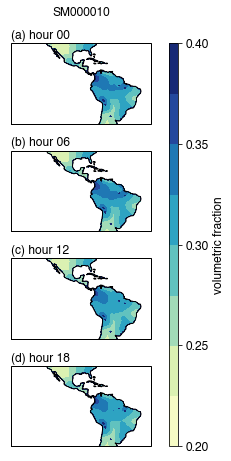

In [190]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='SM000010'

levels=numpy.arange(0.2,0.41,0.025)

ax_list = []
for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())
    #ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    contour_plot = ax.contourf(XLONG_M, XLAT_M, sm000010_list[i], levels=levels, cmap='YlGnBu')
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)
    
fig.tight_layout(h_pad=2)

# colorbar
ax_top = ax_list[0].get_position()
ax_bottom = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(0.2,0.41,0.05))
cbar.set_label('volumetric fraction', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

Text(0.5,1.3,'SM010200')

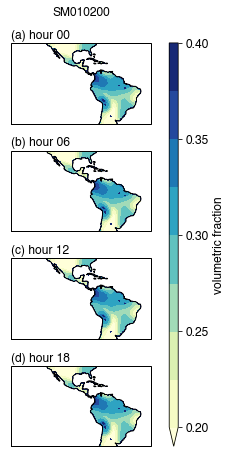

In [191]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='SM010200'

levels=numpy.arange(0.2,0.41,0.025)

ax_list = []
for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())
    #ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    contour_plot = ax.contourf(XLONG_M, XLAT_M, sm010200_list[i], levels=levels, cmap='YlGnBu', extend='min')
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)
    
fig.tight_layout(h_pad=2)

# colorbar
ax_top = ax_list[0].get_position()
ax_bottom = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(0.2,0.41,0.05))
cbar.set_label('volumetric fraction', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

In [300]:
land_paths.__len__()

127

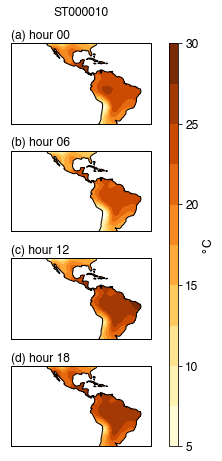

In [557]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='ST000010'

levels=numpy.arange(5,31,2.5)

ax_list = []
for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())
    #ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    contour_plot = ax.contourf(XLONG_M, XLAT_M, st000010_list_landmask[i], levels=levels, cmap='YlOrBr')
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)

fig.tight_layout(h_pad=2)

# colorbar
ax_top = ax_list[0].get_position()
ax_bottom = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
cbar.set_label(DEGREE_SIGN+r'$\,$'+'C', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

mp.savefig('test2.pdf', bbox_inches='tight', transparent=True)

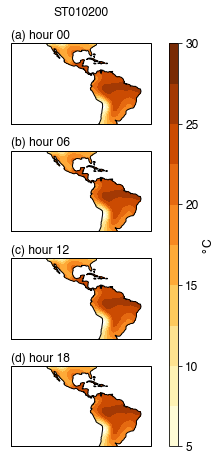

In [556]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='ST010200'

levels=numpy.arange(5,31,2.5)

ax_list = []
for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())
    #ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    contour_plot = ax.contourf(XLONG_M, XLAT_M, st010200_list_landmask[i], levels=levels, cmap='YlOrBr')
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)
    
fig.tight_layout(h_pad=2)

# colorbar
ax_top = ax_list[0].get_position()
ax_bottom = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
cbar.set_label(DEGREE_SIGN+r'$\,$'+'C', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

mp.savefig('test2.pdf', bbox_inches='tight', transparent=True)

# Plot the mean of the 0-200 layer... eventually

# Surface relative humidity

# Surface temperature

In [178]:
skintemp_list = [file.variables['SKINTEMP'][0,:,:]-273.15 for file in ncfile_list]

Text(0.5,1.3,'SKINTEMP')

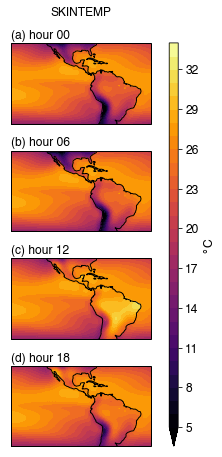

In [179]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='SKINTEMP'

levels=numpy.arange(5,35,1)

ax_list = []
for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())
    #ax.gridlines(ylocs=[0], color='0.25')
    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    contour_plot = ax.contourf(XLONG_M, XLAT_M, skintemp_list[i], levels=levels, cmap='inferno', extend='min')
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)
    
fig.tight_layout(h_pad=2)

# colorbar
ax_top = ax_list[0].get_position()
ax_bottom = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
cbar.set_label(DEGREE_SIGN+r'$\,$'+'C', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

# Low-level jet winds

In [188]:
pres_list = [file.variables['PRES'][0,:,:,:] for file in ncfile_list]
uu_list = [file.variables['UU'][0,:,:,:] for file in ncfile_list]
vv_list = [file.variables['VV'][0,:,:,:] for file in ncfile_list]

numpy.mean(pres_list[0][3,:,:])

85000.0

In [181]:
uu_list_850 = [data[3,:,:] for data in uu_list]
vv_list_850 = [data[3,:,:] for data in vv_list]

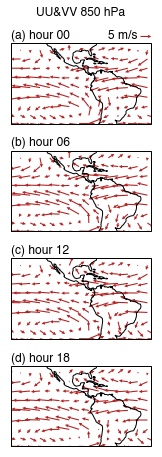

In [241]:
fig = mp.figure(figsize=(2.5,6))
fontsize=12
var_name='UU&VV 850 hPa'

levels=numpy.arange(5,35,1)

every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = 'firebrick'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

ax_list = []
quiver_plot_list = []

for i in range(4):
    ax = fig.add_subplot(4,1,i+1, projection=cartopy.crs.PlateCarree())

    ax.coastlines(resolution='110m')
    ax.set_extent([XLONG_M.min(), XLONG_M.max(), XLAT_M.min(), XLAT_M.max()], crs=cartopy.crs.PlateCarree())
    
    quiver_plot = ax.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
                            XLAT_M[::every_nth_lat,::every_nth_lon], \
                            uu_list_850[i][::every_nth_lat,::every_nth_lon], \
                            vv_list_850[i][::every_nth_lat,::every_nth_lon], \
                            units='xy', scale=quiver_scale, width=quiver_shaft_width, \
                            color=quiver_color, headlength=quiver_head_length, \
                            headaxislength=quiver_head_axis_length)    
    quiver_plot_list.append(quiver_plot)
    ax_list.append(ax)

    ax.text(s=letter_titles[i]+' '+time_titles[i], x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax.transAxes)
    
fig.tight_layout(h_pad=2)

# ax_top = ax_list[0].get_position()
# ax_bottom = ax_list[-1].get_position()
# cbar_ax = fig.add_axes([ax_bottom.x1+0.05,ax_bottom.y0,0.05,ax_top.y1-ax_bottom.y0])
# cbar = mp.colorbar(contour_plot, cax=cbar_ax)
# cbar.ax.tick_params(labelsize=fontsize)
# #cbar.set_ticks(numpy.arange(280,301,5))
# cbar.set_label(DEGREE_SIGN+r'$\,$'+'C', fontsize=fontsize)

ax.text(s=var_name,x=ax_top.x0+0.5*ax_top.width,y=1.3,ha='center',va='bottom',fontsize=fontsize,transform=ax_list[0].transAxes)

fontprops = {}
fontprops['size'] = fontsize
quiver_key = ax_list[0].quiverkey(quiver_plot_list[0], X=1.0, Y=1.08, labelpos='E', label='', U=quiver_key_scale, fontproperties=fontprops, coordinates='axes')
quiver_key_text = ax_list[0].text(s=str(quiver_key_scale)+' m/s', x=0.9, y=1.02, transform=ax_list[0].transAxes, fontsize=fontsize, ha='right', va='bottom')

mp.savefig('test.pdf', transparent=True, bbox_inches='tight')

# Topography

# Land use?